# Introduction to Matplotlib. Part 2

Welcome back. This is the second part of the Data Visualization with Matplotlib Workshop. Last time we learned the basics of how matplotlib works. Today, we will be focusing on applying those basics concepts to create different kinds of plots. We will be focusing on

 - Scatter plots 
 - Lines with Errors
 - Histograms
 - Barplots
 - Pictures (like photographs)
 - Heatmaps
 - Contour plots

Lot of ground to cover, but you will see that the basic syntax is always the same.

We will mostly be using the Baby Name Dataset introduced yesterday. As a reminder, it shows the number of newborns with a given name in each year starting from 1965. Let's load the data and start.

In [3]:
import pandas as pd
import numpy as np

# Read the name data from a csv
#names = pd.read_csv('national_reduced.csv')
name_data_url = r'https://raw.githubusercontent.com/non87/Matplotlib-Workshop/master/national_reduced.csv?token=AFYWZVENRVVF2JPOG6XTWFK7ELZA4'
names = pd.read_csv(name_data_url)
# Look at the column names and data type
print(f'{names.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192014 entries, 0 to 1192013
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1192014 non-null  int64 
 1   Id          1192014 non-null  int64 
 2   Name        1192014 non-null  object
 3   Year        1192014 non-null  int64 
 4   Gender      1192014 non-null  object
 5   Count       1192014 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 54.6+ MB
None


### Scatter Plots (and Their Parameters)

Using the definition of _scatter plot_ that Google suggests, "A scatter plot uses dots to represent values for two different numeric variables". They are mostly used to study how two variables co-vary together. For example, you can plot time and number of newborns with a given name. 

We will analyze the use of "Morgan" and "Taylor" over time. We start by constructing two pandas `DataFrame` containing the total number o

In [57]:
# Nancy data
morgan = names.loc[names["Name"] == "Morgan", :]
taylor = names.loc[names["Name"] == "Taylor", :]
# Relevant years
years_morgan = morgan['Year'].unique()
years_taylor = taylor['Year'].unique()
# For each year, we get the proportion of newborns named morgan/taylor who is F
# We first construct a DataFrame containing the number of girls and total newborns for each year for Morgan
morgan = pd.DataFrame({"Girls": morgan.loc[morgan['Gender'] == "F", :].groupby(['Year']).sum()['Count'], 'Total': morgan.groupby(['Year']).sum()['Count']})
# Same for Taylor
taylor = pd.DataFrame({"Girls": taylor.loc[taylor['Gender'] == "F", :].groupby(['Year']).sum()['Count'], 'Total': taylor.groupby(['Year']).sum()['Count']})
# Get the proportions
morgan['Proportion'] = morgan['Girls'] / morgan['Total']
taylor['Proportion'] = taylor['Girls'] / taylor['Total']
# The years are there as the index in the two DataFrame. It is convenient to have the years as columns
morgan['Year'] = morgan.index
taylor['Year'] = taylor.index
print(f"This is how the Morgan data looks like:\n\n{morgan.head()}")

This is how the Morgan data looks like:

      Girls  Total  Proportion  Year
Year                                
1965     44    252    0.174603  1965
1966     34    258    0.131783  1966
1967     43    314    0.136943  1967
1968     36    299    0.120401  1968
1969     63    396    0.159091  1969


We start with plotting both the Morgan and the Taylor data in the same plot. This will work as a quick recap of what we did yesterday. Besides the use of the method `scatter()` , the next code block does not introduce anything new.

<IPython.core.display.Javascript object>


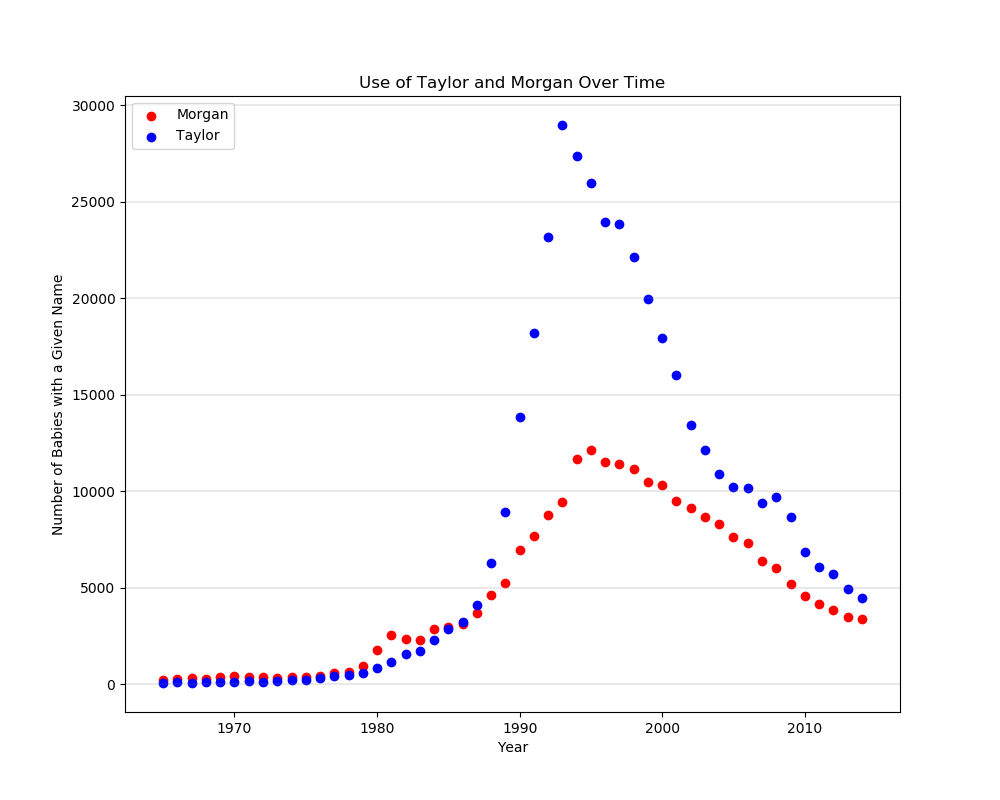

In [71]:
# Let's not forget to set the backend and load matplotlib 
%matplotlib nbagg
import matplotlib.pyplot as plt
# The fundamental line
fig, ax = plt.subplots(figsize=(10,8))
# Usual settings
ax.set_title('Use of Taylor and Morgan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
# Now the scatter plot
ax.scatter(morgan['Year'], morgan['Total'], color = 'red', label = 'Morgan')
ax.scatter(taylor['Year'], taylor['Total'], color = 'blue', label = 'Taylor')
ax.legend(loc='upper left')
ax.grid(color=(0.5,0.5,0.5,0.2), axis='y', lw=0.25)